In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading'

In [3]:
file1=f'{bigDir}\\signals_org_v4.csv'
file2=f'{bigDir}\\20191202_new dataset\\signals_new_v5.csv'
file3=f'{bigDir}\\20200207_new data\\cellinfo_200203_v10.csv'

In [4]:
data1=pd.read_csv(file1)
data2=pd.read_csv(file2)
data3=pd.read_csv(file3)

In [5]:
file4=f'{bigDir}//20200217_geminin//200217_cellinfo_v8.csv'
data4=pd.read_csv(file4)
data4=data4.loc[(data4.group=='CTL'),:]

In [6]:
frames=[data1,data2,data3,data4]
data=pd.concat(frames)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [7]:
data.head()

,Amy_mod,DAPI ch,DHB_cyto,DHB_len,DHB_nucleus,DHB_ratio,DIC ch,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,...,physical_age [min],physical_age_cleaned,time_mismatch,track_cell_id,track_length,track_vs_measure,x,x_track,y,y_track
0,0.0,3.0,"[638.2180000000001, 639.193, 962.079, 759.0060...",5.0,"[1966.295, 2202.657, 1303.344, 885.76699999999...","[0.3245789670420766, 0.2901918001758785, 0.738...",4.0,0,NaN,NaN,...,NaN,30.0,-2.0,1.0,5.0,0.0,158.0,159.5,906.0,902.0
1,0.0,3.0,"[580.302, 662.867, 973.7439999999999, 801.477,...",13.0,"[1839.964, 1542.5320000000002, 995.20800000000...","[0.31538769236789416, 0.4297265794161806, 0.97...",4.0,1,NaN,NaN,...,NaN,110.0,-2.0,2.0,13.0,0.0,832.0,826.0,252.0,252.0
2,0.0,3.0,"[548.491, 508.965, 907.77, 722.7660000000001, ...",13.0,"[1821.02, 1307.132, 940.35, 737.2239999999999,...","[0.30119987699201545, 0.38937536530358063, 0.9...",4.0,2,NaN,NaN,...,NaN,110.0,-2.0,3.0,13.0,0.0,888.0,889.5,160.0,160.0
3,0.0,3.0,"[707.5169999999999, 757.383, 972.8560000000001...",118.0,"[2686.2470000000003, 2341.842, 1190.095, 1046....","[0.2633849381683813, 0.3234133643516514, 0.817...",4.0,3,NaN,NaN,...,NaN,1160.0,-2.0,5.0,118.0,0.0,172.0,175.0,324.0,322.5
4,0.0,3.0,"[562.317, 720.635, 811.617, 703.069, 849.654, ...",114.0,"[1670.207, 2252.272, 1659.5220000000002, 1006....","[0.33667503489088474, 0.3199591345983078, 0.48...",4.0,4,NaN,NaN,...,NaN,1120.0,-2.0,6.0,114.0,0.0,492.0,492.5,506.0,503.5


In [8]:
data.day.unique()

array(['d20190625', 'd20190506', 'd20190607', 'd20190609', 'd20190701',
       'd201907012', 'd201907016', 'd20191203', 'd20200203', 'd20200217'],
      dtype=object)

In [9]:
# will be fixing the entry for `d201907016`
data.loc[data.day=='d201907016','day']='d20190716'

In [10]:
data.day.unique()

array(['d20190625', 'd20190506', 'd20190607', 'd20190609', 'd20190701',
       'd201907012', 'd20190716', 'd20191203', 'd20200203', 'd20200217'],
      dtype=object)

Checking to see if the categories that we are interested in `G1 phase` are in uniform categories

In [11]:
data.category.unique()

array(['earlyG1', 'G2', 'lateG1', 'middleG1', 'S', 'earlyS', 'EarlyS',
       'earllyS', 'G0', 'middel G1', 'early S', 'es', 'ES', 'special'],
      dtype=object)

In [12]:
data.loc[(data.category == 'middel G1'),'category']='middleG1'

In [13]:
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)

In [14]:
data=data.loc[(data['ab1 (heterochromatin)']=='HP1B') | 
              (data['ab2 (heterochromatin)']=='HP1beta') | (data['ab2 (heterochromatin)'] == 'HP1'), :]

Finalize the dataframe for cells that use `HP1B`.

In [15]:
dataHP1B=data.loc[(data['ab1 (heterochromatin)']=='HP1B') | (data['ab2 (heterochromatin)']=='HP1beta'), :]

In [16]:
dataHP1B['ab1 (heterochromatin)'].unique()

array(['HP1B', nan], dtype=object)

In [17]:
dataHP1B['ab2 (heterochromatin)'].unique()

array([nan, 'HP1beta'], dtype=object)

Will not be including `d20190625` and `d201907012` from the days because these days were not included in the initial analysis as well. 

# Plotting days with HP1Beta.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


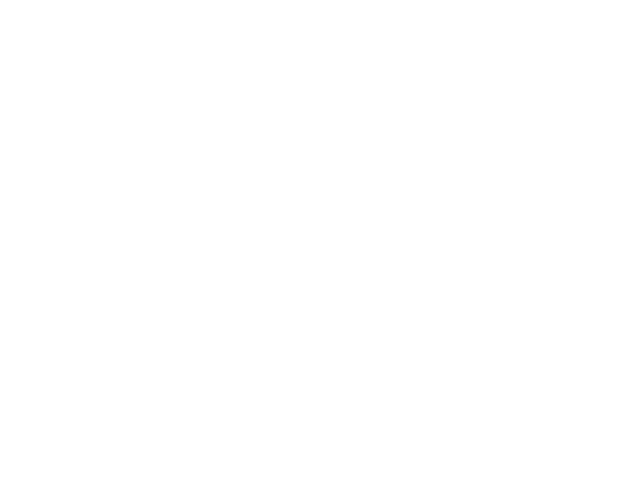

Text(0.5, 1.0, 'Relative MCM loading in Heterochromatin to Nucleus pixels')

In [18]:
%matplotlib notebook
dataHP1B['temp']=(dataHP1B.nuc_mcm_het/dataHP1B.nuc_DAPI_het)/(dataHP1B.nuc_mcm_total/dataHP1B.nuc_DAPI_total)
sns.boxplot(x='category',y='temp',data=dataHP1B.loc[((dataHP1B.day!='d20190625') & (dataHP1B.day!='d201907012') &
                                                           ['G1' in x for x in dataHP1B.category]),:],hue='day')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.xlabel('G1 phases')
plt.title('Relative MCM loading in Heterochromatin to Nucleus pixels')

In [19]:
dataHP1B.loc[dataHP1B.day=='d20190716','category'].unique()

array(['earlyG1', 'middleG1', 'S'], dtype=object)

From the boxplot plotted and the unique values of categories of the experiment day `20190716`, we see that there weren't any cells in the `lateG1` phase. Will remove this day of experiment for the next plot. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


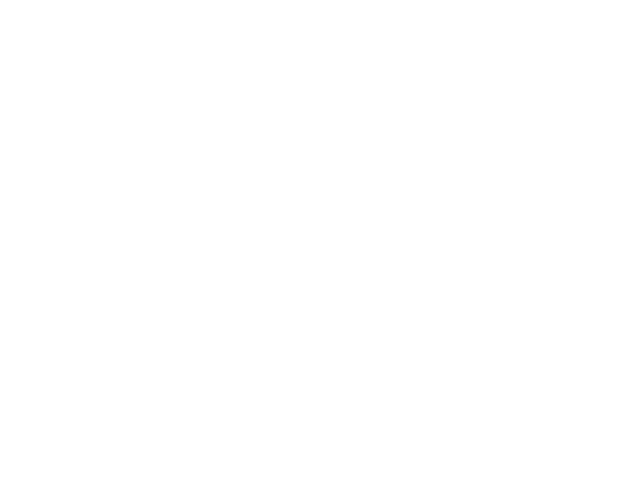

Text(0.5, 1.0, 'Relative MCM loading in Heterochromatin to Nucleus pixels')

In [20]:
%matplotlib notebook
dataHP1B['temp']=(dataHP1B.nuc_mcm_het/dataHP1B.nuc_DAPI_het)/(dataHP1B.nuc_mcm_total/dataHP1B.nuc_DAPI_total)
sns.boxplot(x='category',y='temp',data=dataHP1B.loc[((dataHP1B.day!='d20190625') & (dataHP1B.day!='d201907012') 
                                                      & (dataHP1B.day!='d20190716') &
                                                           ['G1' in x for x in dataHP1B.category]),:],hue='day')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.xlabel('G1 phases')
plt.title('Relative MCM loading in Heterochromatin to Nucleus pixels')

In [21]:
from matplotlib import axes as ax

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


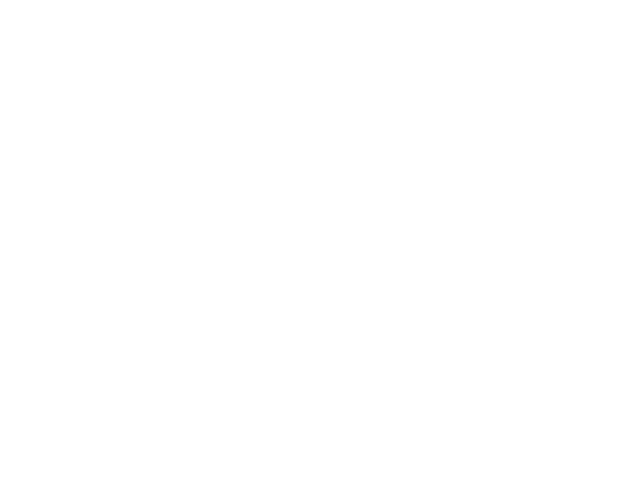

Text(0.5, 1.0, 'MCM proportion in heterochromatin to nucleus pixels')

In [22]:
%matplotlib notebook
dataHP1B['temp']=(dataHP1B.nuc_mcm_het/dataHP1B.nuc_DAPI_het)/(dataHP1B.nuc_mcm_total/dataHP1B.nuc_DAPI_total)
ax=sns.boxplot(x='category',y='temp',data=dataHP1B.loc[((dataHP1B.day!='d20190625') & (dataHP1B.day!='d201907012') 
                                                      & (dataHP1B.day!='d20190716') &
                                                           ['G1' in x for x in dataHP1B.category]),:],hue='day',boxprops=dict(alpha=.5))
sns.swarmplot(x='category',y='temp',data=dataHP1B.loc[((dataHP1B.day!='d20190625') & (dataHP1B.day!='d201907012') 
                                                      & (dataHP1B.day!='d20190716') &
                                                           ['G1' in x for x in dataHP1B.category]),:],hue='day',dodge=True, alpha=0.7)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5])
plt.ylabel('MCM/DAPI [het/nuc]')
plt.xlabel('G1 phases')
plt.title('MCM proportion in heterochromatin to nucleus pixels')

In [23]:
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)

In [24]:
from sklearn import preprocessing

<IPython.core.display.Javascript object>


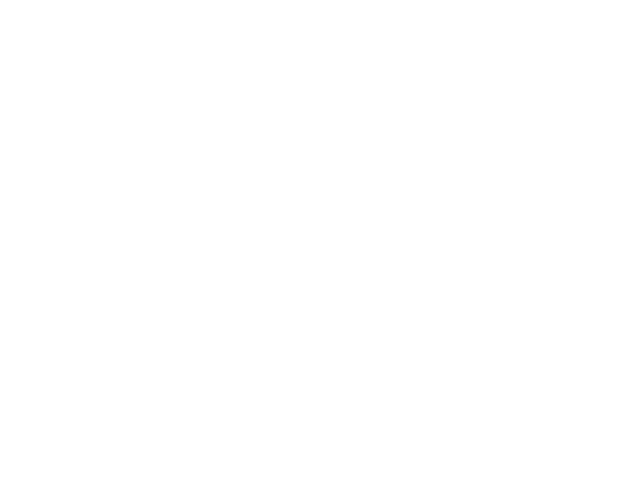

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [25]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
ax=sns.boxplot(x='category',y='temp',data=data.loc[((data.day!='d20190625') & (data.day!='d201907012') 
                                                      & (data.day!='d20190716') &
                                                           ['G1' in x for x in data.category]),:],hue='day',boxprops=dict(alpha=.5),palette='PuRd')
sns.swarmplot(x='category',y='temp',data=data.loc[((data.day!='d20190625') & (data.day!='d201907012') 
                                                      & (data.day!='d20190716') &
                                                           ['G1' in x for x in data.category]),:],hue='day',dodge=True,palette='PuRd')


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:6], labels[:6])
plt.ylabel('MCM/DAPI [het/nuc]')
plt.xlabel('G1 phases')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels')

# compare HP1B dataset #2,3 and HP1 data

In [26]:
data4HP1=data.loc[((data['day']!='d20190506') & (data['day']!='d20190625')
                   &(data['day']!='d20190607') &(data['day']!='d20190609')
                    & (data['day']!='d201907012') & (data.day!='d20190716')
                    & ['G1' in x for x in data.category]),:]

<IPython.core.display.Javascript object>


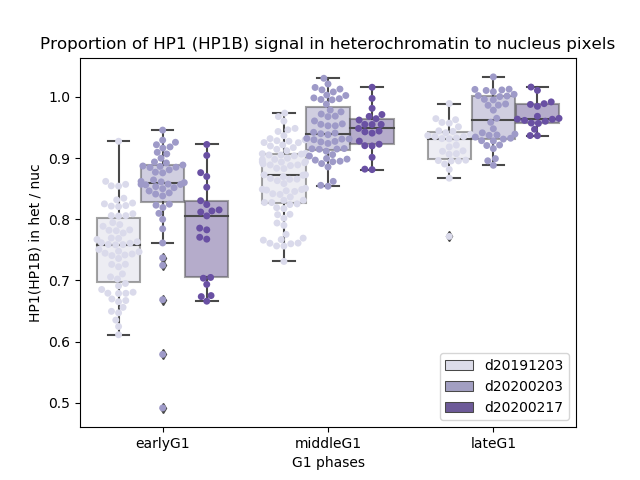

Text(0.5, 1.0, 'Proportion of HP1 (HP1B) signal in heterochromatin to nucleus pixels')

In [30]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
ax=sns.boxplot(x='category',y='temp',data=data4HP1,hue='day',boxprops=dict(alpha=.5), palette='Purples',order=['earlyG1','middleG1','lateG1'])
sns.swarmplot(x='category',y='temp',data=data4HP1,hue='day',dodge=True, palette='Purples',order=['earlyG1','middleG1','lateG1'])


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3])
plt.ylabel('HP1(HP1B) in het / nuc')
plt.xlabel('G1 phases')
plt.title('Proportion of HP1 (HP1B) signal in heterochromatin to nucleus pixels')

## T-test 
- **Null hypotheses**: Groups means are equal (no variation in means of groups)
- **Alternative hypotheses**: Mean values between the two groups are different.

In [31]:
stats.ttest_ind(data4HP1.loc[data4HP1.category=='earlyG1','temp'],data4HP1.loc[data4HP1.category=='middleG1','temp'])

Ttest_indResult(statistic=-12.51698485384547, pvalue=8.607428290577e-29)

In [32]:
stats.ttest_ind(data4HP1.loc[data4HP1.category=='earlyG1','temp'],data4HP1.loc[data4HP1.category=='lateG1','temp'])

Ttest_indResult(statistic=-15.439843661035525, pvalue=2.4278474809763603e-36)

Since the p-values are siginificant at 5%, we have enough evidence to reject the null hypothesis that the means between the two groups are equal and conclude that the mean values of the two groups are different. Therefore, the mean value of early G1 compared to middle G1 and late G1 is different.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


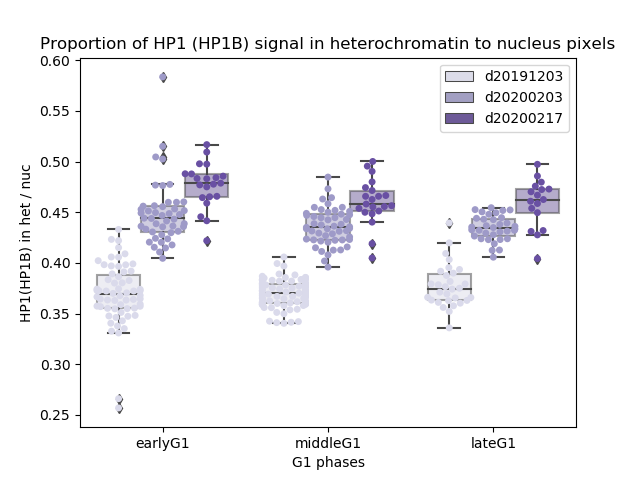

Text(0.5, 1.0, 'Proportion of HP1 (HP1B) signal in heterochromatin to nucleus pixels')

In [33]:
%matplotlib notebook
data4HP1['temp']=(data4HP1.nuc_hp1b_het/data4HP1.nuc_hp1b_total)
ax=sns.boxplot(x='category',y='temp',data=data4HP1,hue='day',boxprops=dict(alpha=.5), palette='Purples',order=['earlyG1','middleG1','lateG1'])
sns.swarmplot(x='category',y='temp',data=data4HP1,hue='day',dodge=True, palette='Purples',order=['earlyG1','middleG1','lateG1'])


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3])
plt.ylabel('HP1(HP1B) in het / nuc')
plt.xlabel('G1 phases')
plt.title('Proportion of HP1 (HP1B) signal in heterochromatin to nucleus pixels')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


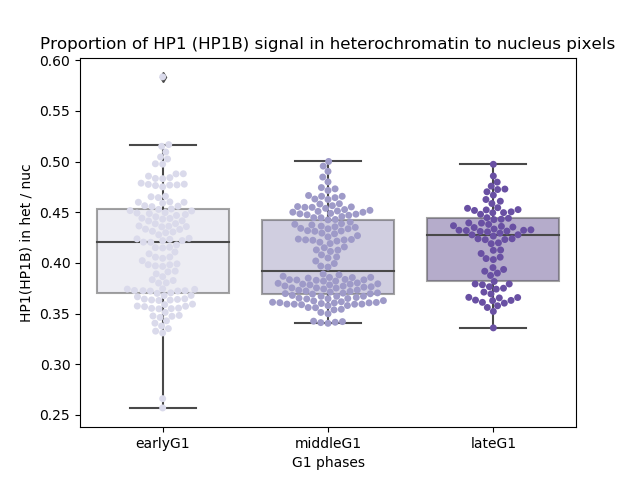

Text(0.5, 1.0, 'Proportion of HP1 (HP1B) signal in heterochromatin to nucleus pixels')

In [34]:
%matplotlib notebook
data4HP1['temp']=(data4HP1.nuc_hp1b_het/data4HP1.nuc_hp1b_total)
ax=sns.boxplot(x='category',y='temp',data=data4HP1,boxprops=dict(alpha=.5), palette='Purples',order=['earlyG1','middleG1','lateG1'])
sns.swarmplot(x='category',y='temp',data=data4HP1,dodge=True, palette='Purples',order=['earlyG1','middleG1','lateG1'])

plt.ylabel('HP1(HP1B) in het / nuc')
plt.xlabel('G1 phases')
plt.title('Proportion of HP1 (HP1B) signal in heterochromatin to nucleus pixels')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


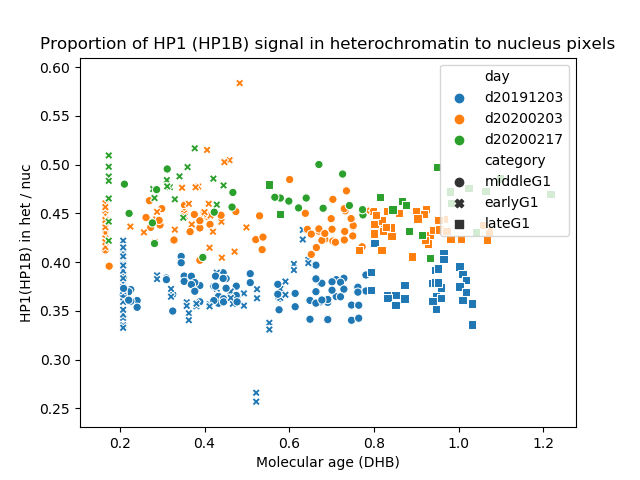

Text(0.5, 1.0, 'Proportion of HP1 (HP1B) signal in heterochromatin to nucleus pixels')

In [35]:
%matplotlib notebook
data4HP1['temp']=(data4HP1.nuc_hp1b_het/data4HP1.nuc_hp1b_total)
sns.scatterplot(x='mol_age_mod',y='temp',data=data4HP1,hue='day',style='category')

plt.ylabel('HP1(HP1B) in het / nuc')
plt.xlabel('Molecular age (DHB)')
plt.title('Proportion of HP1 (HP1B) signal in heterochromatin to nucleus pixels')

In [36]:
data4HP1.loc[data4HP1['category']=='earlyG1','temp'].mean()

0.41493656128248524

In [37]:
data4HP1.loc[data4HP1['category']=='middleG1','temp'].mean()

0.40487691672419723

In [38]:
data4HP1.loc[data4HP1['category']=='lateG1','temp'].mean()

0.4184624862141709

## T-test 
- **Null hypotheses**: Groups means are equal (no variation in means of groups)
- **Alternative hypotheses**: Mean values between the two groups are different.

In [39]:
stats.ttest_ind(data4HP1.loc[data4HP1.category=='earlyG1','temp'],data4HP1.loc[data4HP1.category=='middleG1','temp'])

Ttest_indResult(statistic=1.7681885939678532, pvalue=0.07813008306673883)

In [40]:
stats.ttest_ind(data4HP1.loc[data4HP1.category=='earlyG1','temp'],data4HP1.loc[data4HP1.category=='lateG1','temp'])

Ttest_indResult(statistic=-0.514331564619254, pvalue=0.6075662304151989)

Since the p-values of the t-tests are not significant at 5% level, we do not have enough evidence to reject the null hypothesis. Therefore, we can conclude that the mean values of HP1 (or HP1B) signal proportions in heterochromatin pixels to nucleus pixels are same for three categories of G1 phase. 